## Train a Linear Model

# <b> <u> <font color = green> CA 683 Project : Used Car Sales </u> </b>

Dataset with used Car Sales from United States

Our Dataset was downloaded from Kaggle:

https://www.kaggle.com/tsaustin/us-used-car-sales-data

Team:
- Emma Dunne
- Tony Delaney
- Meenu Matthew
- Darren Spain


## <font color = green> Import Necessary files and read in the Used Car Data Set and other Data Sets.

In [466]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import math


In [467]:
pip install ipython[all]

In [468]:
from google.colab import drive
import os
drive.mount("/content/drive", force_remount=True)

# mounting a specific directory on my google drive for data storage and retrieval
#os.chdir("/content/drive/u/1/shared-with-me")
os.chdir("/content/drive/MyDrive/CA683/683 Project")
#os.chdir("/content/drive/My Drive/CA683SharedFolder")
!ls
#shared-with-me/CA683SharedFolder/



Mounted at /content/drive
 Boxplots.gdoc
'Copy of April_07_10pm_used_car_sales.ipynb'
'Copy of April_08_3pm_used_car_sales.ipynb'
 DisposableIncomeGasPriceByState.csv
 DisposableIncomeGasPriceByState_Rev2.csv
 DisposableIncomeGasPriceByState_Rev2.csv.gsheet
 DisposableIncomeGasPriceByState_Rev3.csv
'Emma April_06_1pm_used_car_sales.ipynb'
'Emma - April_07_10am_used_car_sales.ipynb'
 March_22_11am_used_car_sales.ipynb
 March_23_used_car_sales.ipynb
'Melbourne Housing Market.gslides'
 NYFed_Household_debt_HHD_C_Report_2020Q4.xlsx
 used_car_sales_210405.csv


In [469]:
df = pd.read_csv('used_car_sales_210405.csv',sep=',')


In [470]:
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated
0,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan
1,45848,6200,2019,11727,46292,2101,NaN,1977,NaN,NaN,Sedan,4,RWD,sedan
2,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv
3,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe
4,3285,7900,2019,35565,100,AC Cobra,NaN,1965,NaN,V8,NaN,0,NaN,coupe


In [471]:
df.describe
# Source data has 122144 rows

<bound method NDFrame.describe of             ID  pricesold  ...         DriveType Body_Updated
0        18489       2200  ...               RWD        sedan
1        45848       6200  ...               RWD        sedan
2        11937      13000  ...               4WD          suv
3        20524      98000  ...          ROADSTER        coupe
4         3285       7900  ...               NaN        coupe
...        ...        ...  ...               ...          ...
122139   73886       7000  ...               RWD        coupe
122140  140306      15000  ...               RWD        sedan
122141   97836      16770  ...               NaN        sedan
122142   65284       5000  ...               RWD        coupe
122143   47292      19350  ...  Rear Wheel Drive        coupe

[122144 rows x 14 columns]>

# Rows with missing Model

In [472]:
# noModeldf is new df with just cars with no model, 573 rows
noModeldf = df[df['Model'].isnull()]


In [473]:
# this prints all cars with nomodel
print(noModeldf['Make'].value_counts().to_string())

Other Makes                                            153
Willys                                                  83
Replica/Kit Makes                                       60
Citroën                                                 38
Studebaker                                              29
Nash                                                    27
Packard                                                 25
Opel                                                    19
DeLorean                                                11
Shelby                                                  10
DeSoto                                                   9
Austin                                                   7
Hudson                                                   5
Smart                                                    4
Diamond T                                                4
Crosley                                                  3
Dodge                                                   

### Most of the missing models are:
1. Other Makes                                            153
2. Willys                                                  83
3. Replica/Kit Makes                                       60
4. Citroën                                                 38
5. Studebaker                                              29
6. Nash                                                    27
7. Packard                                                 25
8. Opel                                                    19
9. DeLorean                                                11
10. Shelby                                                  10
11. DeSoto                                                   9
12. Austin                                                   7
13. Hudson                                                   5
14. Smart                                                    4
15. Diamond T                                                4
16. Ariel                                                    3
17. Crosley                                                  3
There is even a single 'Scooby Doo Mystery machine' listed

In [ ]:
# for the 'Other Makes' ther is alot of other information missing- Trim, Engine, BodyType, 
display(noModeldf[noModeldf['Make'] =='Other Makes' ])

In [475]:
# 118 of 'Other Makes' have null for Engine
sum(noModeldf[noModeldf['Make'] =='Other Makes']['Engine'].isnull())

118

In [476]:
# Studebaker year from 1913 to 1964, 29 of these cars
noModeldf[noModeldf['Make'] =='Studebaker'].describe()
 

,ID,pricesold,yearsold,Mileage,Year,NumCylinders
count,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000
mean,90606.068966,7241.034483,2019.379310,5.376585e+05,1952.344828,3.724138
std,46711.562589,6878.533557,0.493804,2.284337e+06,10.919432,3.769204
min,2535.000000,300.000000,2019.000000,2.000000e+02,1925.000000,0.000000
25%,49916.000000,2470.000000,2019.000000,3.455400e+04,1950.000000,0.000000
50%,98093.000000,4500.000000,2019.000000,5.190000e+04,1954.000000,4.000000
75%,127335.000000,9000.000000,2020.000000,7.400000e+04,1962.000000,8.000000
max,156846.000000,30000.000000,2020.000000,1.234568e+07,1964.000000,8.000000


In [477]:
# 38 Citroen although not sold since 1974
# https://en.wikipedia.org/wiki/Citroën
# Citroën is a global brand, except in North America, where the company has not returned since the SM was effectively banned 
# in 1974 for not meeting U.S. National Highway Traffic Safety Administration (NHTSA) bumper height regulations.
#noModeldf[noModeldf['Make'] =='Citroën'].describe()

In [478]:
# Because of these, the missing models will be deleted from the dataset
df = df[df['Model'].notna()]
df

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated
0,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan
2,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv
3,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe
5,22338,1040,2019,93635,109147,Acura,CL,2001,3.2 Type S 2dr Coupe,3.2L V6,2dr Car,6,2dr Cpe 3.2L Type S,coupe
6,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122138,89997,19990,2019,60101,34126,Zimmer,Golden Spirit,1982,2dr Coupe,4.2L,Coupe,0,--,coupe
122139,73886,7000,2019,85225,35683,Zimmer,Golden spirit,1984,NaN,5.0 v8,Coupe,8,RWD,coupe
122140,140306,15000,2020,334**,30000,Zimmer,Golden Spirit,1987,LX,5.0L Gas V8,Sedan,8,RWD,sedan
122141,97836,16770,2020,78006,47784,Zimmer,Golden Spirit,1984,Zimmer Golden Spirit,5.0 v8,Sedan,8,NaN,sedan


### Read in Disposable income per state

create this Dataframe to capture the yearly disposable income per state and Gas price per state. This will be combined with our car sales dataframe at a later stage.Also make state as its index

In [479]:
df_Disposable_income_Gas_price = pd.read_csv('DisposableIncomeGasPriceByState_Rev3.csv',usecols=['State','Region','Disp_Inc_2015','Disp_Inc_2016','Disp_Inc_2017','Disp_Inc_2018','Disp_Inc_2019','Disp_Inc_2020','Gas_Price_2016','Gas_Price_2017','Gas_Price_2018','Gas_Price_2019','Gas_Price_2020'],index_col="State")

In [480]:
df_Disposable_income_Gas_price.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Washington DC', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West', 'USA all states'],
      dtype='object', name='State')

In [481]:
df_Disposable_income_Gas_price.head()

,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
State,,,,,,,,,,,,
Alabama,GulfCoast,38884,39530,41021,42701,44139,44559,2.02,2.30,2.53,2.35,1.92
Alaska,WestCoast,57602,56351,57416,60342,62799,62406,2.02,2.30,2.53,2.35,1.92
Arizona,WestCoast,39700,40798,42572,44583,46050,46238,2.40,2.70,3.11,3.09,2.63
Arkansas,GulfCoast,39505,40380,41655,43320,44624,44748,2.02,2.30,2.53,2.35,1.92
California,WestCoast,55835,58047,60555,63721,66608,67023,2.02,2.30,2.53,2.35,1.92
Colorado,RockyMontain,52262,52485,55586,58903,61149,60833,2.78,3.08,3.55,3.68,3.13
Connecticut,EastCoast,68361,69898,71721,74857,77270,75914,2.14,2.43,2.75,2.66,2.34
Delaware,EastCoast,48015,48825,50782,52923,54474,54287,2.26,2.53,2.83,2.65,2.23
Washington DC,EastCoast,75482,77837,79245,81269,83390,82230,2.31,2.64,2.89,2.73,2.35


### Create 2 Dicts GasDict and IncomeDict
Key (year, State) with value is GasPrice or Income i.e.
* (2019, 'Alabama') 2.35
* (2020, 'Alabama') 1.92


In [482]:
# #df['yearsold']
# #os.chdir('/content/drive/MyDrive/')
# file1 = file1="DisposableIncomeGasPriceByState_Rev2.csv"
# GasDict    = {}
# IncomeDict = {}
# f = open(file1, "r")
# for line in f:
#     line = line.strip('\n')
#     myarray = line.split(',')
#     if (myarray[0] != "State"):
#         for i in range(24,29):
#             gas_year = 1992 + i
#             income_year = 1992 + i
#             IncomeDict[(income_year,myarray[0])] = myarray[i]
#             GasDict[(gas_year,myarray[0])] = myarray[i+12]
            
            
# #print the dict to verify contents
# for k, v in GasDict.items():
#   print(k, v)


### Zip Code Manipulation

ZIP Codes are numbered with the first digit representing a certain group of U.S. states, the second and third digits together representing a region in that group (or perhaps a large city) and the fourth and fifth digits representing a group of delivery addresses within that region.
Therefore for the purpose of this exercise, we can take the first 3 digits of the zipcode as a meaningful represenatation of an area.

In [483]:
# firstly ensure that any empty strings are replaced with NAN in zipcode coloumn
df['zipcode'].replace('', np.nan, inplace = True)
zipcode_nan = len(df['zipcode']) - df['zipcode'].count()
print ( 'There are ', zipcode_nan , ' entries with Not A Number (NAN) entries in the zipcode coloumn')

# drop the null values in zipcode coloumn
df.dropna(subset=['zipcode'], inplace= True)

# strip of last characters of the zipcode and keep the first 3 characters
df['cleaned_zipcode'] = df.zipcode.apply(lambda x: x[:3])

# ensure that only numercic values are in Zipcode and replace all others with NAN
# Note : this code removes the leading zeros from the zipcodes.
df['cleaned_zipcode'] = pd.to_numeric(df.cleaned_zipcode, errors ='coerce', downcast= 'signed')
df.dropna(subset=['cleaned_zipcode'], inplace= True)


There are  903  entries with Not A Number (NAN) entries in the zipcode coloumn


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel

In [484]:
#print(df.cleaned_zipcode)
print("The count of unique zipcodes in this Dataframe is ",df.cleaned_zipcode.nunique())
df.cleaned_zipcode.head()


The count of unique zipcodes in this Dataframe is  920


0    328.0
2    890.0
3    701.0
5    936.0
6    333.0
Name: cleaned_zipcode, dtype: float64

Run a sanity check to ensure that the cleaned zipcode has the first 3 digits of the old zipcode

In [485]:
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode
0,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0
2,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv,890.0
3,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe,701.0
5,22338,1040,2019,93635,109147,Acura,CL,2001,3.2 Type S 2dr Coupe,3.2L V6,2dr Car,6,2dr Cpe 3.2L Type S,coupe,936.0
6,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0


### Age of Car Information to be added

In [486]:
def find_age_car (row):
  yearofSale = row['Year']
  yearsOld = row['yearsold']

  if (yearofSale <=99) :
    # we got double digit entry for sale in 19XX e.g. 86 for 1986
    yearofSale = yearofSale +1000
    age_car = row['yearsold'] - row['yearsold']
  elif yearofSale == yearsOld :
    # Car was sold in same year as Manufacture
    age_car = 1  
  elif yearofSale > yearsOld:
    # entries entered in reverse order
    age_car = yearofSale - yearsOld
  elif yearofSale >= 10000 :
    # Car entry is proceeded by various 0's
    age_car = ((row['yearsold'] - (yearofSale/10000) ) )
  else:
    age_car = row['yearsold'] - row['Year']

  if age_car < 0 :
    # This is to catch any cars that are now showing negative years on them.
    print("we got an old one....")
    print(yearsOld)
    print(yearofSale)
  
  return age_car

run the function to find age of car across entire dataframe and add a new column for Age of car at time of sale.

In [487]:
df['CarAgeTimeSale'] = df.apply (find_age_car, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [488]:
df.head(10)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode,CarAgeTimeSale
0,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0,13
2,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv,890.0,55
3,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe,701.0,31
5,22338,1040,2019,93635,109147,Acura,CL,2001,3.2 Type S 2dr Coupe,3.2L V6,2dr Car,6,2dr Cpe 3.2L Type S,coupe,936.0,18
6,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0,18
7,33485,4250,2019,19446,114961,Acura,CL,2003,Type S,"3.2 liter, 260HP",Coupe,6,FWD,coupe,194.0,16
8,131546,2950,2020,082**,111200,Acura,CL,2003,TYPE-S,3.2L Gas V6,Coupe,0,FWD,coupe,82.0,17
9,14524,900,2019,91603,240000,Acura,CL,1999,NaN,NaN,Coupe,4,FWD,coupe,916.0,20
10,97863,2750,2020,76111,139901,Acura,CL,1998,3.0L V6! Timing Belt Done Leather TEXAS NO RES...,3.0L V6 F SOHC 24V,Coupe,6,FWD,coupe,761.0,22
11,128586,270,2020,928**,213763,Acura,CL,1997,2.2,2.2L I4 16V,Coupe,4,FWD,coupe,928.0,23


### Break Zipcodes down to State level

the original dataset for car sales came with ZipCodes. We propose to break this down by state to allow other state level data to be considered. i.e. disposable income at a state by state level

In [489]:
def zipcode_to_state(row):
  zipcode = row['cleaned_zipcode']
  if zipcode in range(350,370):
    return 'Alabama'
    #return 'Alabamba'
  elif zipcode in range(995,1000):
    return 'Alaska'
  elif zipcode in range(850,866):
    return 'Arizona'
  elif zipcode in range(716,730):
    return 'Arkansas'
  elif zipcode in range(900,962):
    return 'California'
  elif zipcode in range(800,817):
    return 'Colorado'
  elif zipcode in range(60,70):
    return 'Connecticut'
  elif zipcode in range(197,200):
    return 'Delaware'
  elif zipcode in range(320,350):
    return 'Florida'
  elif zipcode in range(300,320):
    return 'Georgia'
  elif zipcode in range(398,400):
    return 'Georgia'
  elif zipcode in range(967,969):
    return 'Hawaii'
  elif zipcode in range(832,839):
    return 'Idaho'
  elif zipcode in range(600,630):
    return 'Illinois'
  elif zipcode in range(460,480):
    return 'Indiana'
  elif zipcode in range(500,529):
    return 'Iowa'
  elif zipcode in range(660,680):
    return 'Kansas'
  elif zipcode in range(400,428):
    return 'Kentucky'
  elif zipcode in range(700,715):
    return 'Louisiana'
  elif zipcode in range(39,50):
    return 'Maine'
  elif zipcode in range(205,220):
    return 'Maryland'
  elif zipcode in range(10,56):
    return 'Massachusetts'
  elif zipcode in range(480,500):
    return 'Michigan'
  elif zipcode in range(550,568):
    return 'Minnesota'
  elif zipcode in range(386,398):
    return 'Mississippi'
  elif zipcode in range(630,659):
    return 'Missouri'
  elif zipcode in range(590,600):
    return 'Montana'
  elif zipcode in range(680,694):
    return 'Nebraska'
  elif zipcode in range(889,899):
    return 'Nevada'
  elif zipcode in range(30,39):
    return 'New Hampshire'
  elif zipcode in range(70,90):
    return 'New Jersey'
  elif zipcode in range(870,885):
    return 'New Mexico'  
  elif zipcode in range(5,6):
    return 'New York' 
  elif zipcode in range(100,150):
    return 'New York'
  elif zipcode in range(270,290):
    return 'North Carolina'
  elif zipcode in range(580,589):
    return 'North Dakota'
  elif zipcode in range(430,460):
    return 'Ohio'
  elif zipcode in range(730,750):
    return 'Oklahoma'
  elif zipcode in range(970,980):
    return 'Oregon'
  elif zipcode in range(150,197):
    return 'Pennsylvania'
  elif zipcode in range(6,10):
    return 'Puerto Rico'
  elif zipcode in range(28,30):
    return 'Rhode Island'  
  elif zipcode in range(290,300):
    return 'South Carolina' 
  elif zipcode in range(570,578):
    return 'South Dakota'
  elif zipcode in range(370,386):
    return 'Tennessee'
  elif zipcode in range(733,800):
    return 'Texas'
  elif zipcode in range(885,886):
    return 'Texas'
  elif zipcode in range(840,848):
    return 'Utah'
  elif zipcode in range(50,60):
    return 'Vermont'
  elif zipcode in range(889,899):
    return 'Virginia'
  elif zipcode in range(220,247):
    return 'Virginia'
  elif zipcode in range(980,995):
    return 'Washington'
  elif zipcode in range(200,206):
    return 'Washington DC'
  elif zipcode in range(247,269):
    return 'West Virginia'  
  elif zipcode in range(530,550):
    return 'Wisconsin'
  elif zipcode in range(820,835):
    return 'Wyoming'
  else:
    return 'StateUnknown'

In [490]:
df['State'] = df.apply (zipcode_to_state, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [491]:
pd.set_option('display.max_rows', 1000)
print(df)

            ID  pricesold  ...  CarAgeTimeSale       State
0        18489       2200  ...              13     Florida
2        11937      13000  ...              55      Nevada
3        20524      98000  ...              31   Louisiana
5        22338       1040  ...              18  California
6        30924       4300  ...              18     Florida
...        ...        ...  ...             ...         ...
122138   89997      19990  ...              37    Illinois
122139   73886       7000  ...              35     Arizona
122140  140306      15000  ...              33     Florida
122141   97836      16770  ...              36       Texas
122143   47292      19350  ...              36  California

[119844 rows x 17 columns]


In [492]:
df.head(5)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode,CarAgeTimeSale,State
0,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0,13,Florida
2,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv,890.0,55,Nevada
3,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe,701.0,31,Louisiana
5,22338,1040,2019,93635,109147,Acura,CL,2001,3.2 Type S 2dr Coupe,3.2L V6,2dr Car,6,2dr Cpe 3.2L Type S,coupe,936.0,18,California
6,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0,18,Florida


we need to check that no zipcode was missed and count the states that came back as 'StateUnknown'

In [493]:
df['State'].value_counts()

California        16902
Florida           12491
Pennsylvania       9250
Texas              7840
New York           7140
Michigan           6700
Ohio               4543
Illinois           3861
Maryland           3118
Georgia            2987
North Carolina     2864
Washington         2799
Colorado           2743
Arizona            2600
Indiana            2505
Virginia           2400
Tennessee          2044
Missouri           1989
Oregon             1743
Nevada             1599
New Jersey         1577
Kentucky           1490
South Carolina     1442
Wisconsin          1417
Kansas             1253
Minnesota          1127
Louisiana          1115
Oklahoma           1095
Alabama            1060
Massachusetts       967
Nebraska            943
Iowa                927
Idaho               870
New Mexico          867
Mississippi         768
Utah                760
Arkansas            646
West Virginia       581
Connecticut         517
Washington DC       469
Montana             437
Delaware        

certain zipcodes showed State unknown. Zipcode 1 is for destinations outside of USA. Zipcode 886, 887, 888 are not in use . Zipcode 963 is for Military bases in Japan. These entries should be removed from out DataFrame.

In [494]:
df.drop(df.loc[df['State']== 'StateUnknown'].index, inplace=True)
# pd.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [495]:
print("This should now show as empty dataframe as we have deleted StateUnknown entries")
print(df.loc[df['State'] == 'StateUnkown'])

This should now show as empty dataframe as we have deleted StateUnknown entries
Empty DataFrame
Columns: [ID, pricesold, yearsold, zipcode, Mileage, Make, Model, Year, Trim, Engine, BodyType, NumCylinders, DriveType, Body_Updated, cleaned_zipcode, CarAgeTimeSale, State]
Index: []


### reset the index 

In [496]:
df['StateSoldIn']=df['State']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



reset the index on this Dataframe to be the State that the car was sold in.

In [497]:
df=df.set_index('State')
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode,CarAgeTimeSale,StateSoldIn
State,,,,,,,,,,,,,,,,,
Florida,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0,13,Florida
Nevada,11937,13000,2019,89060,73000,1964 International,Scout 80,1964,NaN,stock,SUV,4,4WD,suv,890.0,55,Nevada
Louisiana,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,coupe,701.0,31,Louisiana
California,22338,1040,2019,93635,109147,Acura,CL,2001,3.2 Type S 2dr Coupe,3.2L V6,2dr Car,6,2dr Cpe 3.2L Type S,coupe,936.0,18,California
Florida,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0,18,Florida


### join our dataframes

we now need to join our dataframes together to have our final dataframe that we will analysis for our project

In [498]:
df= pd.merge(df,df_Disposable_income_Gas_price,on='State')
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,20296,2190,2019,33647,93415,Acura,CL,2001,TYPE-S,3.2 LITER V6 VTEC ENGINE,Coupe,6,FWD,coupe,336.0,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,85297,6760,2019,32256,90000,Acura,CL,2003,TYPE S,NaN,NaN,0,NaN,coupe,322.0,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,96382,10500,2019,33160,22719,Acura,ILX,2016,NaN,2.4,Sedan,4,FWD,sedan,331.0,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35


In [499]:

# tuple1 = [tuple(r) for r in df[['yearsold','StateSoldIn']].to_numpy()]

# gas_array = []
# inc_array = []
# #GasDict[(tuple1)]
# for tuple_x in tuple1:
#   gas_val = GasDict[(tuple_x)]
#   inc_val = IncomeDict[(tuple_x)]
#   gas_array.append(gas_val)
#   inc_array.append(inc_val)
# df['GasPrice'] = gas_array
# df['Income'] = inc_array

In [500]:
df.head(5)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Body_Updated,cleaned_zipcode,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,18489,2200,2019,32804,120583,300,CHRYSLER,2006,LIMITED,V-6,SEDAN,6,RWD,sedan,328.0,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,30924,4300,2019,33304,84849,Acura,CL,2001,3.2 Type S 1-Owner Navigation Heated Seats,3.2L V6 24V,Coupe,6,FWD,coupe,333.0,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,20296,2190,2019,33647,93415,Acura,CL,2001,TYPE-S,3.2 LITER V6 VTEC ENGINE,Coupe,6,FWD,coupe,336.0,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,85297,6760,2019,32256,90000,Acura,CL,2003,TYPE S,NaN,NaN,0,NaN,coupe,322.0,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,96382,10500,2019,33160,22719,Acura,ILX,2016,NaN,2.4,Sedan,4,FWD,sedan,331.0,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35


### Final cleanup of Dataframe

In [501]:
df= df.drop(["ID", "cleaned_zipcode", "zipcode","Trim","Make","Year","Engine","BodyType","NumCylinders","DriveType"],axis=1)

df.head()

,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
State,,,,,,,,,,,,,,,,,,,
Florida,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35


In [502]:
df.describe()

,pricesold,yearsold,Mileage,CarAgeTimeSale,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
count,119742.000000,119742.000000,1.197420e+05,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000,119742.000000
mean,10766.968065,2019.373662,1.411737e+06,26.378305,48825.622280,49910.841409,52030.327763,54545.127190,56455.512619,56664.480107,2.211080,2.495520,2.778982,2.646044,2.215591
std,13943.182887,0.503388,3.343741e+07,20.098147,6636.803749,7153.199220,7608.402488,7997.079532,8518.208334,8594.327626,0.158939,0.169499,0.224845,0.282275,0.268945
min,0.000000,2018.000000,1.000000e+00,1.000000,35199.000000,35665.000000,36543.000000,37843.000000,38908.000000,39508.000000,2.020000,2.290000,2.530000,2.350000,1.900000
25%,2950.000000,2019.000000,4.500000e+04,11.000000,43462.000000,44629.000000,45948.000000,47776.000000,49221.000000,50008.000000,2.140000,2.410000,2.670000,2.490000,2.090000
50%,6480.000000,2019.000000,9.016850e+04,19.000000,46560.000000,46541.000000,48511.000000,51121.000000,52804.000000,52881.000000,2.210000,2.460000,2.670000,2.540000,2.090000
75%,13700.000000,2020.000000,1.406470e+05,42.000000,55835.000000,58047.000000,60555.000000,62701.000000,64752.000000,65062.000000,2.310000,2.640000,2.890000,2.730000,2.350000
max,404990.000000,2020.000000,1.235669e+09,895.000000,75482.000000,77837.000000,79245.000000,81269.000000,83390.000000,82230.000000,2.780000,3.080000,3.550000,3.680000,3.130000


Add cleanup here to remove any cars where price sold was equal to 0 dollars

In [503]:
df=df[df.pricesold !=0]

In [504]:
df.describe()

,pricesold,yearsold,Mileage,CarAgeTimeSale,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
count,119711.000000,119711.000000,1.197110e+05,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000
mean,10769.756246,2019.373708,1.411203e+06,26.380015,48825.621722,49910.876995,52030.330187,54545.099740,56455.465229,56664.434363,2.211087,2.495529,2.778995,2.646059,2.215605
std,13943.911417,0.503388,3.344052e+07,20.098637,6636.896669,7153.227165,7608.395923,7997.028472,8518.135151,8594.258225,0.158940,0.169500,0.224847,0.282279,0.268949
min,10.000000,2018.000000,1.000000e+00,1.000000,35199.000000,35665.000000,36543.000000,37843.000000,38908.000000,39508.000000,2.020000,2.290000,2.530000,2.350000,1.900000
25%,2950.000000,2019.000000,4.500000e+04,11.000000,43462.000000,44629.000000,45948.000000,47776.000000,49221.000000,50008.000000,2.140000,2.410000,2.670000,2.490000,2.090000
50%,6490.000000,2019.000000,9.015800e+04,19.000000,46560.000000,46541.000000,48511.000000,51121.000000,52804.000000,52881.000000,2.210000,2.460000,2.670000,2.540000,2.090000
75%,13700.000000,2020.000000,1.406130e+05,42.000000,55835.000000,58047.000000,60555.000000,62701.000000,64752.000000,65062.000000,2.310000,2.640000,2.890000,2.730000,2.350000
max,404990.000000,2020.000000,1.235669e+09,895.000000,75482.000000,77837.000000,79245.000000,81269.000000,83390.000000,82230.000000,2.780000,3.080000,3.550000,3.680000,3.130000


In [505]:
df['log_Price_Sold']=np.log((df['pricesold']))

In [506]:
df.head()

,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,log_Price_Sold
State,,,,,,,,,,,,,,,,,,,,
Florida,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,7.696213
Florida,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,8.366370
Florida,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,7.691657
Florida,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,8.818778
Florida,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,9.259131


Add code here to move Log_price_sold to first coloum. This is tider on Heat map analysis later.

In [507]:
log_price_sold = df['log_Price_Sold']
df.drop(labels=['log_Price_Sold'], axis=1,inplace = True)
df.insert(0, 'log_Price_Sold', log_price_sold)

In [508]:
df.head()

,log_Price_Sold,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
State,,,,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,8.366370,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,7.691657,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,8.818778,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35
Florida,9.259131,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35


In [509]:
df.describe()

,log_Price_Sold,pricesold,yearsold,Mileage,CarAgeTimeSale,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020
count,119711.000000,119711.000000,119711.000000,1.197110e+05,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000
mean,8.692510,10769.756246,2019.373708,1.411203e+06,26.380015,48825.621722,49910.876995,52030.330187,54545.099740,56455.465229,56664.434363,2.211087,2.495529,2.778995,2.646059,2.215605
std,1.158625,13943.911417,0.503388,3.344052e+07,20.098637,6636.896669,7153.227165,7608.395923,7997.028472,8518.135151,8594.258225,0.158940,0.169500,0.224847,0.282279,0.268949
min,2.302585,10.000000,2018.000000,1.000000e+00,1.000000,35199.000000,35665.000000,36543.000000,37843.000000,38908.000000,39508.000000,2.020000,2.290000,2.530000,2.350000,1.900000
25%,7.989560,2950.000000,2019.000000,4.500000e+04,11.000000,43462.000000,44629.000000,45948.000000,47776.000000,49221.000000,50008.000000,2.140000,2.410000,2.670000,2.490000,2.090000
50%,8.778018,6490.000000,2019.000000,9.015800e+04,19.000000,46560.000000,46541.000000,48511.000000,51121.000000,52804.000000,52881.000000,2.210000,2.460000,2.670000,2.540000,2.090000
75%,9.525151,13700.000000,2020.000000,1.406130e+05,42.000000,55835.000000,58047.000000,60555.000000,62701.000000,64752.000000,65062.000000,2.310000,2.640000,2.890000,2.730000,2.350000
max,12.911618,404990.000000,2020.000000,1.235669e+09,895.000000,75482.000000,77837.000000,79245.000000,81269.000000,83390.000000,82230.000000,2.780000,3.080000,3.550000,3.680000,3.130000


In [510]:
 # convert Body_updated to a numeric form by using one hot encode
onehot_bodyupdated = pd.get_dummies(df.Body_Updated, prefix='BodyUpdated')
dfonehot = pd.concat([df, onehot_bodyupdated,], axis=1)
dfonehot.head()

,log_Price_Sold,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,BodyUpdated_bike,BodyUpdated_bus,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_hearse,BodyUpdated_limousine,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_tractor,BodyUpdated_truck,BodyUpdated_van
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0
Florida,8.366370,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,7.691657,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,8.818778,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,9.259131,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0


In [512]:
print(df[df['pricesold']>100000][['Body_Updated']].value_counts())


Body_Updated
coupe           181
convertible      68
suv              26
sedan            21
stationwagen      1
pickup            1
dtype: int64


#Visualisation

In [513]:
import plotly.express as px

fig = px.scatter_3d(annualdf, x='Disp_Inc_2019', y='Gas_Price_2019', z='log_Price_Sold',
              color='Region')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

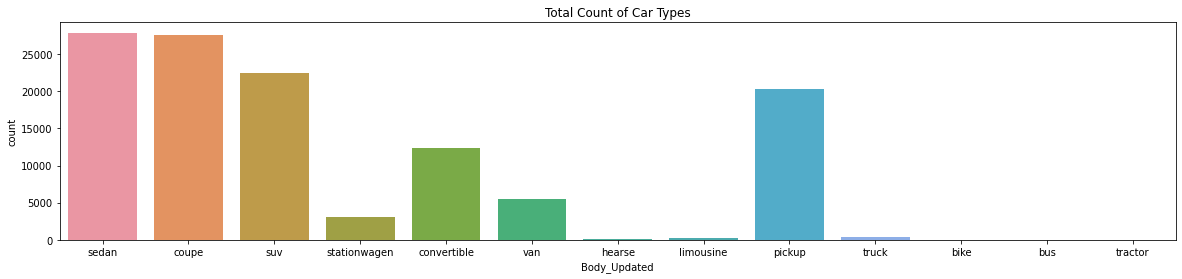

In [514]:
fig, ax = plt.subplots(figsize=(20,4))
plt.title("Total Count of Car Types")
sns.countplot(x="Body_Updated", ax=ax, data=df)

In [515]:
dfonehot.describe()

,log_Price_Sold,pricesold,yearsold,Mileage,CarAgeTimeSale,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,BodyUpdated_bike,BodyUpdated_bus,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_hearse,BodyUpdated_limousine,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_tractor,BodyUpdated_truck,BodyUpdated_van
count,119711.000000,119711.000000,119711.000000,1.197110e+05,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000,119711.000000
mean,8.692510,10769.756246,2019.373708,1.411203e+06,26.380015,48825.621722,49910.876995,52030.330187,54545.099740,56455.465229,56664.434363,2.211087,2.495529,2.778995,2.646059,2.215605,0.000075,0.000342,0.102873,0.229737,0.001011,0.001712,0.169859,0.232619,0.025311,0.187251,0.000025,0.003592,0.045593
std,1.158625,13943.911417,0.503388,3.344052e+07,20.098637,6636.896669,7153.227165,7608.395923,7997.028472,8518.135151,8594.258225,0.158940,0.169500,0.224847,0.282279,0.268949,0.008670,0.018503,0.303794,0.420665,0.031777,0.041347,0.375511,0.422503,0.157069,0.390114,0.005006,0.059826,0.208602
min,2.302585,10.000000,2018.000000,1.000000e+00,1.000000,35199.000000,35665.000000,36543.000000,37843.000000,38908.000000,39508.000000,2.020000,2.290000,2.530000,2.350000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.989560,2950.000000,2019.000000,4.500000e+04,11.000000,43462.000000,44629.000000,45948.000000,47776.000000,49221.000000,50008.000000,2.140000,2.410000,2.670000,2.490000,2.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.778018,6490.000000,2019.000000,9.015800e+04,19.000000,46560.000000,46541.000000,48511.000000,51121.000000,52804.000000,52881.000000,2.210000,2.460000,2.670000,2.540000,2.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.525151,13700.000000,2020.000000,1.406130e+05,42.000000,55835.000000,58047.000000,60555.000000,62701.000000,64752.000000,65062.000000,2.310000,2.640000,2.890000,2.730000,2.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.911618,404990.000000,2020.000000,1.235669e+09,895.000000,75482.000000,77837.000000,79245.000000,81269.000000,83390.000000,82230.000000,2.780000,3.080000,3.550000,3.680000,3.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


our count for rows at this stage should be just over 119, 000 rows for the combined files in this Data Frame

[(0.0, 400000.0)]

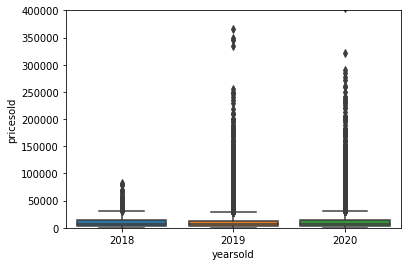

In [516]:
import seaborn as sns

sns.boxplot(x='yearsold', y='pricesold', data=dfonehot).set(ylim=(0, 400000))

In [517]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=dfonehot['pricesold'], groups=dfonehot['yearsold'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  2018   2019 -128.8944    0.9 -1096.0723  838.2834  False
  2018   2020 1055.2178 0.0294    83.6262 2026.8094   True
  2019   2020 1184.1122  0.001   989.4154 1378.8091   True
----------------------------------------------------------


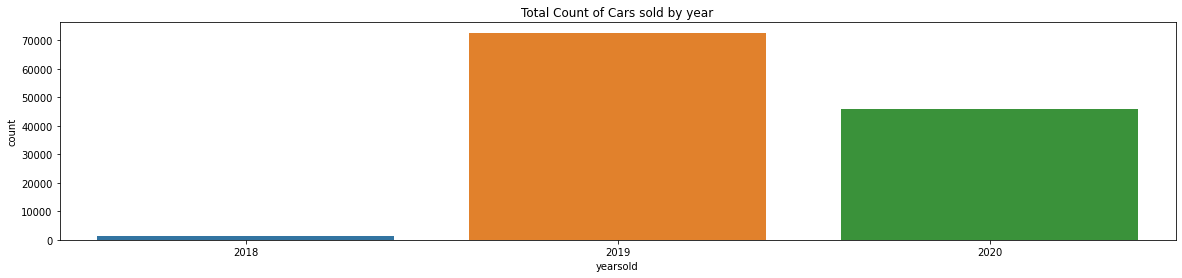

In [518]:
fig, ax = plt.subplots(figsize=(20,4))
plt.title("Total Count of Cars sold by year")
sns.countplot(x="yearsold", ax=ax, data=df)

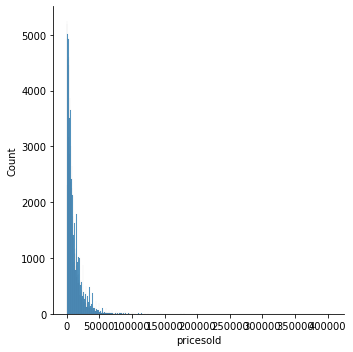

In [519]:
sns.displot(dfonehot, x="pricesold")

In [520]:
from scipy import stats
x= dfonehot["pricesold"]
shapiro_test = stats.shapiro(x)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.6253724098205566, 0.0)

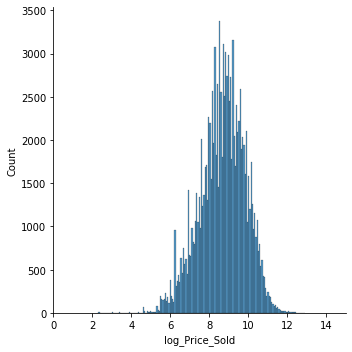

In [521]:

sns.displot(dfonehot, x="log_Price_Sold").set(xlim=(0, 15))

In [522]:
from scipy.stats import kstest
x= dfonehot["log_Price_Sold"]
ks_statistic, p_value = kstest(x,'norm')
print(ks_statistic, p_value)

0.9996451592093003 0.0


In [523]:
from scipy import stats

shapiro_test = stats.shapiro(x)
shapiro_test


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9921112656593323, 0.0)

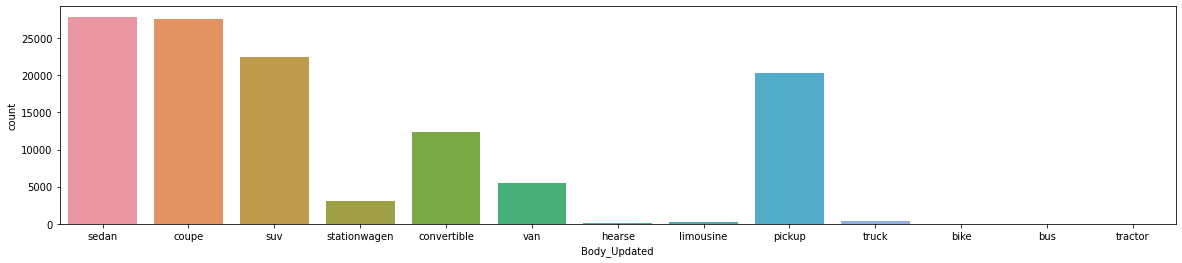

In [524]:
fig, ax = plt.subplots(figsize=(20,4))

sns.countplot(x='Body_Updated', ax=ax,data=dfonehot)

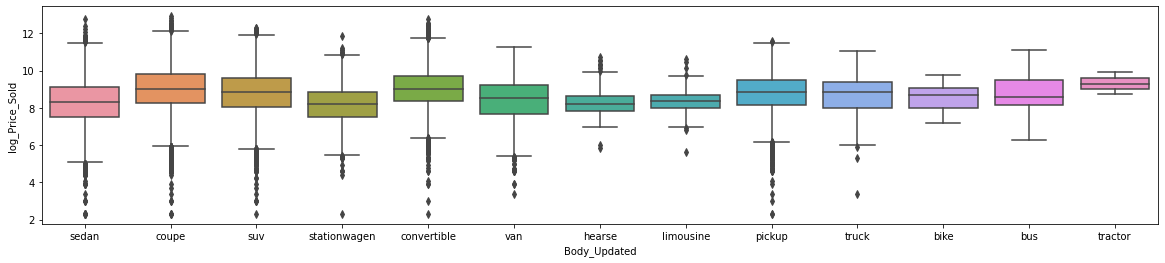

In [525]:
fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x='Body_Updated', y='log_Price_Sold', ax=ax, data=dfonehot)


In [526]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=dfonehot['pricesold'], groups=dfonehot['Body_Updated'], alpha=0.05)
print(m_comp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1       group2     meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------
        bike          bus  3899.3767    0.9 -12755.2375 20553.9909  False
        bike  convertible  7059.9218    0.9  -8026.9827 22146.8262  False
        bike        coupe  7861.1942 0.8781  -7222.6679 22945.0563  False
        bike       hearse  -367.7227    0.9 -15999.9368 15264.4914  False
        bike    limousine -1303.9892    0.9 -16712.8829 14104.9045  False
        bike       pickup  3325.8801    0.9 -11758.8517 18410.6119  False
        bike        sedan   722.3431    0.9 -14361.4884 15806.1746  False
        bike stationwagen  -637.7316    0.9 -15741.5077 14466.0445  False
        bike          suv  4354.7619    0.9 -10729.6599 19439.1838  False
        bike      tractor  5618.8889    0.9 -24543.9003 35781.6781  False
        bike        truck  2423.2377  

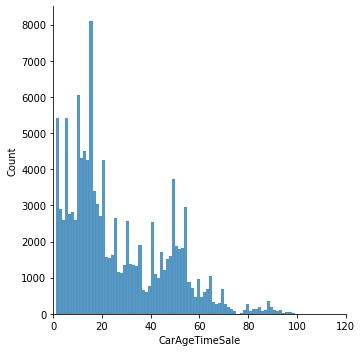

In [527]:

sns.displot(x='CarAgeTimeSale', data=dfonehot,).set(xlim=(0, 120))


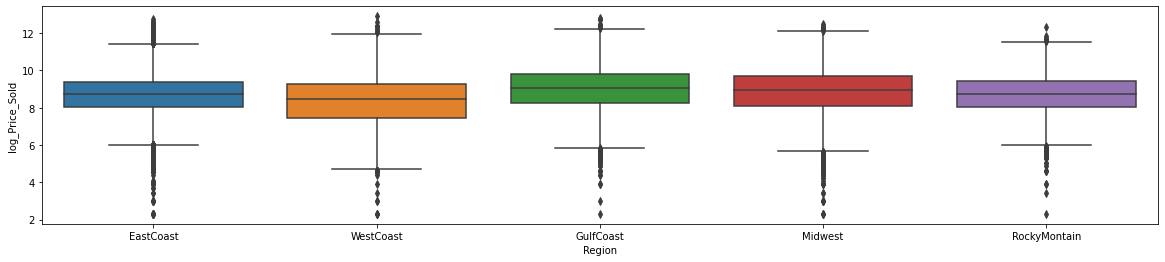

In [528]:
fig, ax = plt.subplots(figsize=(20,4))

sns.boxplot(x='Region', y='log_Price_Sold', data=dfonehot)

In [529]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=dfonehot['pricesold'], groups=dfonehot['Region'], alpha=0.05)
print(m_comp)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1       group2     meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------------
   EastCoast    GulfCoast  3689.0882 0.001  3307.4208  4070.7555   True
   EastCoast      Midwest  1565.6115 0.001  1287.1467  1844.0764   True
   EastCoast RockyMontain   171.4279   0.9  -354.0499   696.9057  False
   EastCoast    WestCoast -1190.2497 0.001  -1492.975  -887.5243   True
   GulfCoast      Midwest -2123.4766 0.001 -2529.5099 -1717.4434   True
   GulfCoast RockyMontain -3517.6602 0.001 -4120.5261 -2914.7944   True
   GulfCoast    WestCoast -4879.3378 0.001  -5302.378 -4456.2976   True
     Midwest RockyMontain -1394.1836 0.001 -1937.6171  -850.7501   True
     Midwest    WestCoast -2755.8612 0.001 -3088.7811 -2422.9412   True
RockyMontain    WestCoast -1361.6776 0.001 -1917.9328  -805.4223   True
----------------------------------------------------------------

[(0.0, 50000.0)]

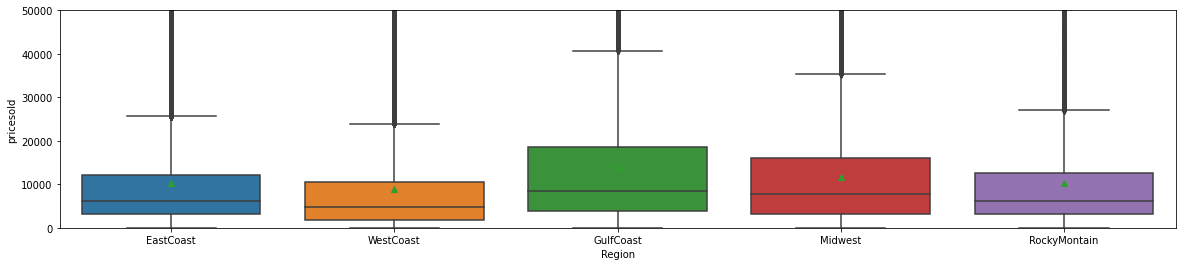

In [530]:
fig, ax = plt.subplots(figsize=(20,4))

sns.boxplot(x='Region', y='pricesold', showmeans=True,data=dfonehot).set(ylim=(0, 50000))

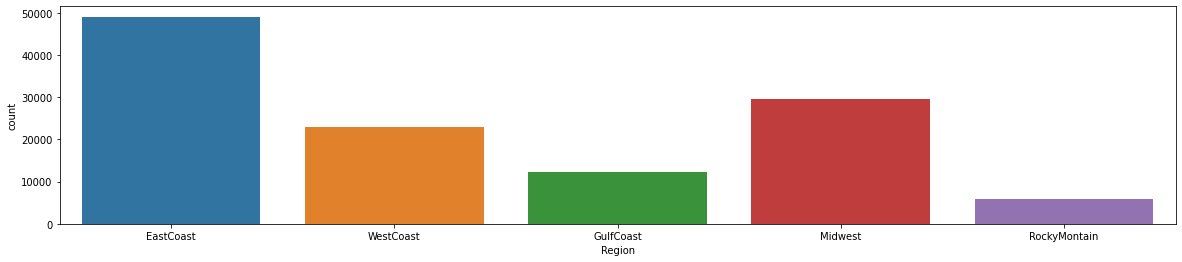

In [531]:
fig, ax = plt.subplots(figsize=(20,4))

sns.countplot(x='Region', ax=ax,data=dfonehot)

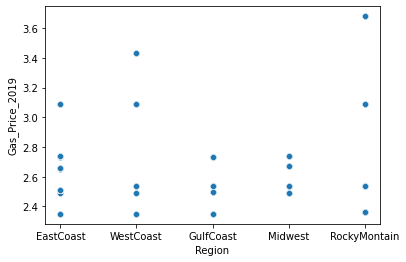

In [532]:
sns.scatterplot(x='Region',y="Gas_Price_2019",data=dfonehot)

In [533]:

dfonehot.head()

,log_Price_Sold,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,BodyUpdated_bike,BodyUpdated_bus,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_hearse,BodyUpdated_limousine,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_tractor,BodyUpdated_truck,BodyUpdated_van
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0
Florida,8.366370,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,7.691657,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,8.818778,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,9.259131,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0


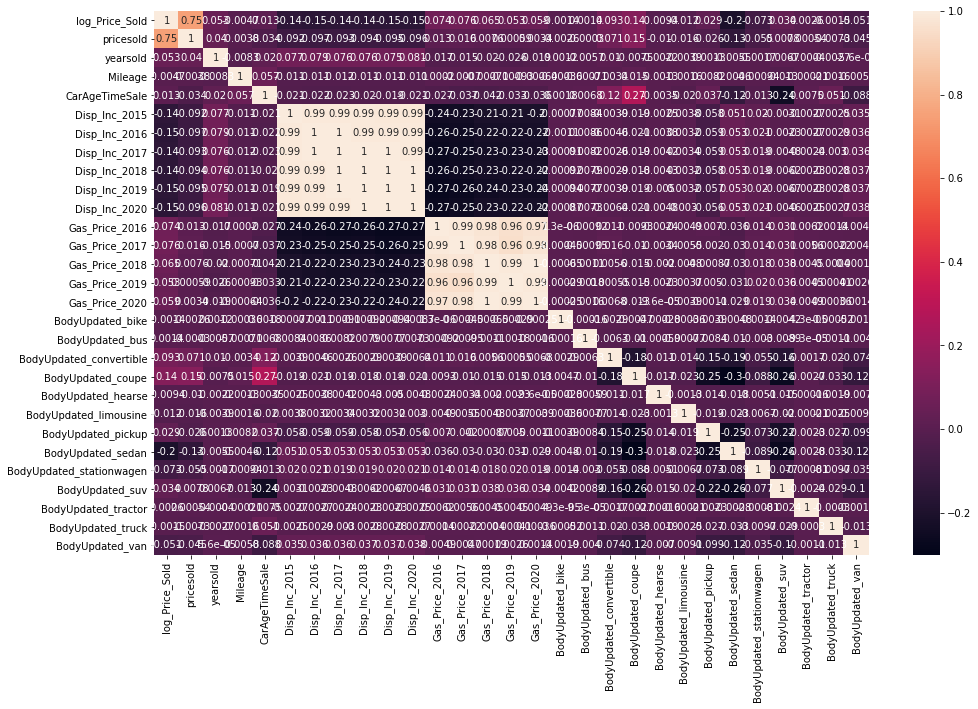

In [534]:
plt.figure(figsize=(16,10))
sns.heatmap(dfonehot.corr(),annot=True)
plt.show()

##  <font color = green> Delete some fields from Dataframe for further analysis. I.e. Low volume sales

In [535]:
dfonehot.head()

,log_Price_Sold,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,BodyUpdated_bike,BodyUpdated_bus,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_hearse,BodyUpdated_limousine,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_tractor,BodyUpdated_truck,BodyUpdated_van
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0
Florida,8.366370,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,7.691657,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,8.818778,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0,0,0,0,0,0,0
Florida,9.259131,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,0,0,0,0,1,0,0,0,0,0


In [536]:
finaldf= dfonehot.drop(["BodyUpdated_hearse", "BodyUpdated_limousine", "BodyUpdated_tractor", "BodyUpdated_bike", "BodyUpdated_truck", "BodyUpdated_bus"],axis=1)

In [537]:
finaldf.head()

,log_Price_Sold,pricesold,yearsold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2015,Disp_Inc_2016,Disp_Inc_2017,Disp_Inc_2018,Disp_Inc_2019,Disp_Inc_2020,Gas_Price_2016,Gas_Price_2017,Gas_Price_2018,Gas_Price_2019,Gas_Price_2020,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,2019,120583,CHRYSLER,sedan,13,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0
Florida,8.366370,4300,2019,84849,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,1,0,0,0,0,0
Florida,7.691657,2190,2019,93415,CL,coupe,18,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,1,0,0,0,0,0
Florida,8.818778,6760,2019,90000,CL,coupe,16,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,1,0,0,0,0,0
Florida,9.259131,10500,2019,22719,ILX,sedan,3,Florida,EastCoast,45250,46076,48511,50967,52402,52116,2.31,2.64,2.89,2.73,2.35,0,0,0,1,0,0,0


We can see from previous heatmap that Gas prices and Disp income are hightly correlated and majority of cars sold information is from 2019. So we will use the Gas and Disp inccome from 2019

In [538]:
finaldf= finaldf.drop(["yearsold","Disp_Inc_2015", "Disp_Inc_2016", "Disp_Inc_2017", "Disp_Inc_2018", "Disp_Inc_2020", "Gas_Price_2016", "Gas_Price_2017", "Gas_Price_2018", "Gas_Price_2020"],axis=1)

In [539]:
finaldf.head()

,log_Price_Sold,pricesold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2019,Gas_Price_2019,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,120583,CHRYSLER,sedan,13,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0
Florida,8.366370,4300,84849,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,7.691657,2190,93415,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,8.818778,6760,90000,CL,coupe,16,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,9.259131,10500,22719,ILX,sedan,3,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0


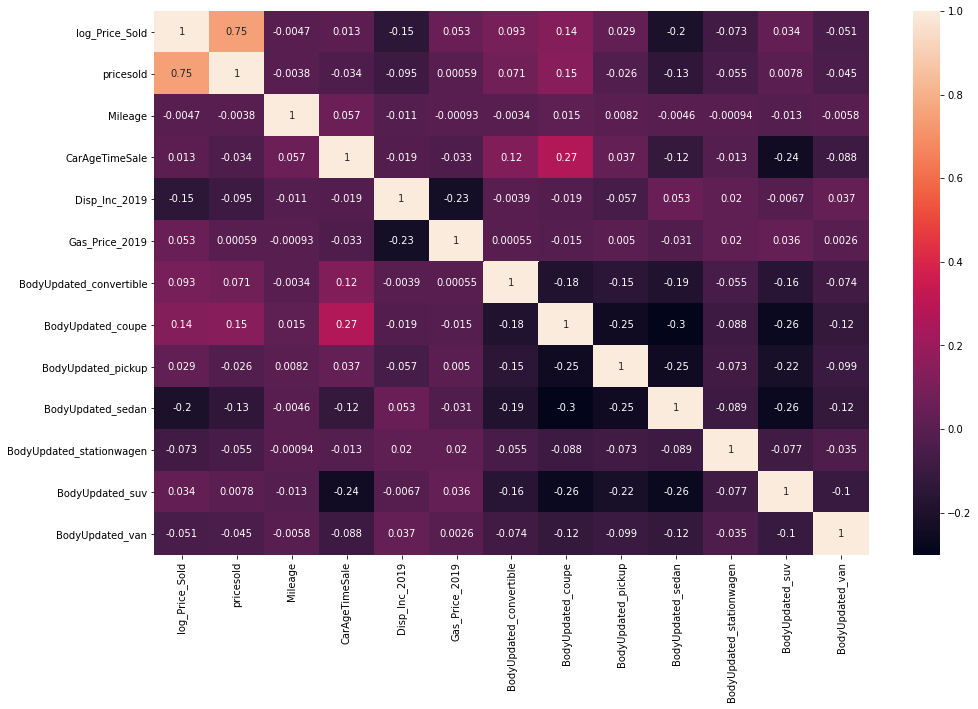

In [540]:
plt.figure(figsize=(16,10))
sns.heatmap(finaldf.corr(),annot=True)
plt.show()

In [561]:
lowenddf=finaldf[finaldf['pricesold']<50000]
lowenddf.head()

,log_Price_Sold,pricesold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2019,Gas_Price_2019,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,120583,CHRYSLER,sedan,13,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0
Florida,8.366370,4300,84849,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,7.691657,2190,93415,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,8.818778,6760,90000,CL,coupe,16,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,9.259131,10500,22719,ILX,sedan,3,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0


In [ ]:
lowenddf.describe

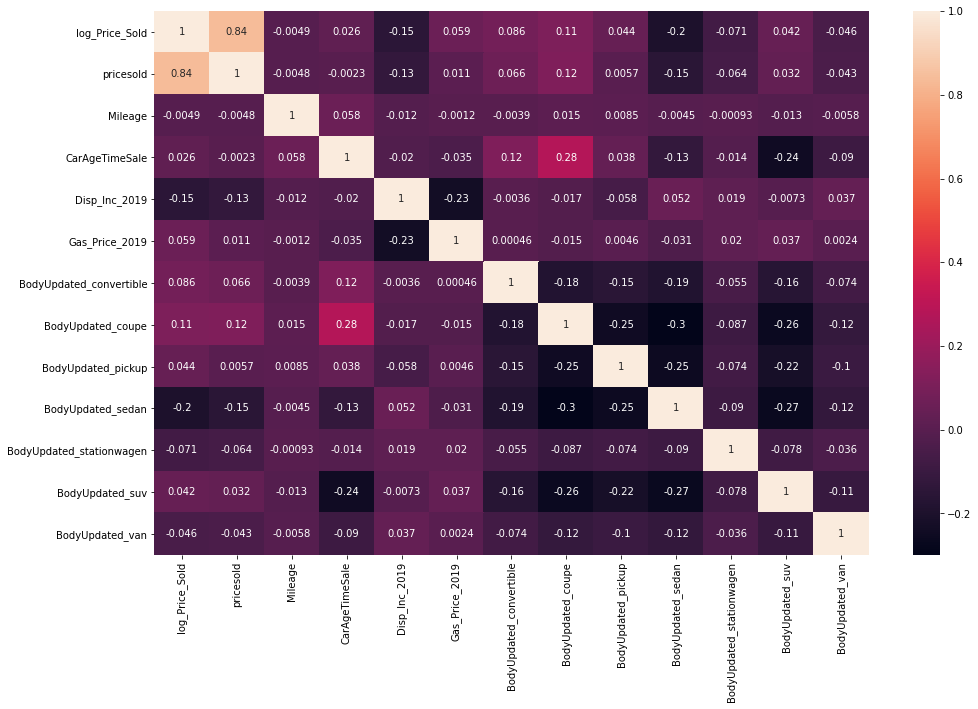

In [563]:
plt.figure(figsize=(16,10))
sns.heatmap(lowenddf.corr(),annot=True)
plt.show()

In [564]:
highenddf=finaldf[finaldf['pricesold']>=50000]
highenddf.head()

,log_Price_Sold,pricesold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2019,Gas_Price_2019,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,,,,,,
Florida,11.849326,139990,1088,NSX,coupe,1,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,10.934891,56100,867,770,convertible,55,Florida,EastCoast,52402,2.73,1,0,0,0,0,0,0
Florida,11.736069,125000,30,Atom V8,convertible,11,Florida,EastCoast,52402,2.73,1,0,0,0,0,0,0
Florida,10.841540,51100,17000,DB9,coupe,5,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,11.759786,128000,2890,DBS,coupe,1,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0


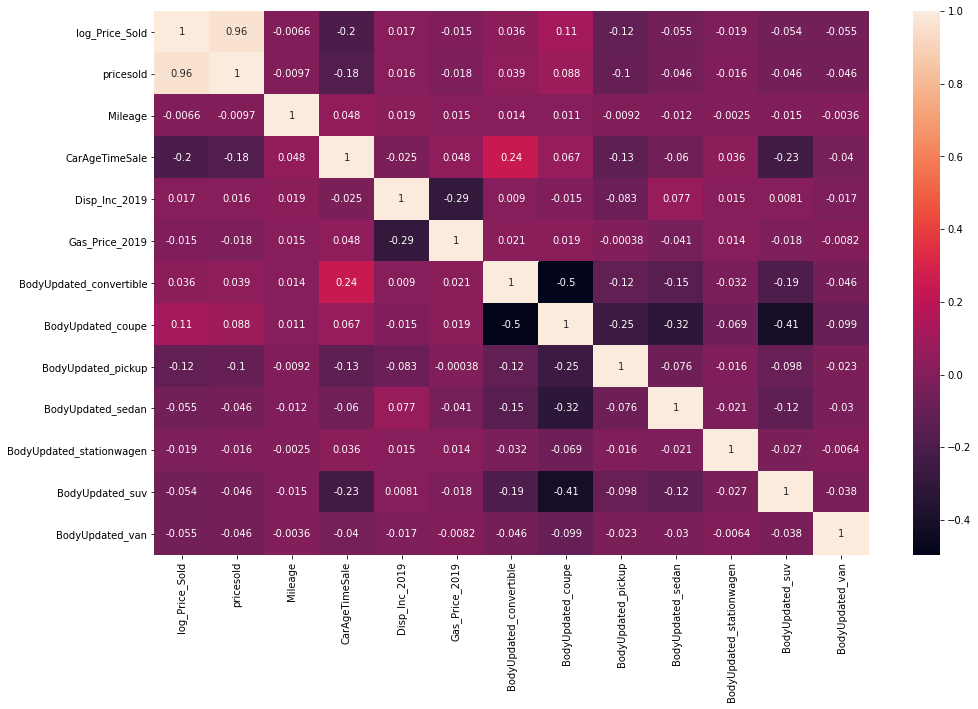

In [565]:
plt.figure(figsize=(16,10))
sns.heatmap(highenddf.corr(),annot=True)
plt.show()

## <font color = red> Work has to be done here for Regresssion to check the Variables to test !!!

In [543]:
df4=finaldf
formula_str="log_Price_Sold~Mileage+CarAgeTimeSale+BodyUpdated_coupe+BodyUpdated_sedan"

print(df4.describe())
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

       log_Price_Sold      pricesold  ...  BodyUpdated_suv  BodyUpdated_van
count   119711.000000  119711.000000  ...    119711.000000    119711.000000
mean         8.692510   10769.756246  ...         0.187251         0.045593
std          1.158625   13943.911417  ...         0.390114         0.208602
min          2.302585      10.000000  ...         0.000000         0.000000
25%          7.989560    2950.000000  ...         0.000000         0.000000
50%          8.778018    6490.000000  ...         0.000000         0.000000
75%          9.525151   13700.000000  ...         0.000000         0.000000
max         12.911618  404990.000000  ...         1.000000         1.000000

[8 rows x 13 columns]
                            OLS Regression Results                            
Dep. Variable:         log_Price_Sold   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:    

In [544]:
formula_str="log_Price_Sold~BodyUpdated_coupe+BodyUpdated_sedan+BodyUpdated_convertible"
df4=finaldf
print(df4.describe())
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

       log_Price_Sold      pricesold  ...  BodyUpdated_suv  BodyUpdated_van
count   119711.000000  119711.000000  ...    119711.000000    119711.000000
mean         8.692510   10769.756246  ...         0.187251         0.045593
std          1.158625   13943.911417  ...         0.390114         0.208602
min          2.302585      10.000000  ...         0.000000         0.000000
25%          7.989560    2950.000000  ...         0.000000         0.000000
50%          8.778018    6490.000000  ...         0.000000         0.000000
75%          9.525151   13700.000000  ...         0.000000         0.000000
max         12.911618  404990.000000  ...         1.000000         1.000000

[8 rows x 13 columns]
                            OLS Regression Results                            
Dep. Variable:         log_Price_Sold   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:    

In [545]:
formula_str="pricesold~CarAgeTimeSale"
df5=dfonehot
print(df5.describe())
result=sm.ols(formula=formula_str,data=df5).fit()
print(result.summary())

       log_Price_Sold      pricesold  ...  BodyUpdated_truck  BodyUpdated_van
count   119711.000000  119711.000000  ...      119711.000000    119711.000000
mean         8.692510   10769.756246  ...           0.003592         0.045593
std          1.158625   13943.911417  ...           0.059826         0.208602
min          2.302585      10.000000  ...           0.000000         0.000000
25%          7.989560    2950.000000  ...           0.000000         0.000000
50%          8.778018    6490.000000  ...           0.000000         0.000000
75%          9.525151   13700.000000  ...           0.000000         0.000000
max         12.911618  404990.000000  ...           1.000000         1.000000

[8 rows x 29 columns]
                            OLS Regression Results                            
Dep. Variable:              pricesold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares 

In [566]:
finaldf.head()

,log_Price_Sold,pricesold,Mileage,Model,Body_Updated,CarAgeTimeSale,StateSoldIn,Region,Disp_Inc_2019,Gas_Price_2019,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,,,,,,
Florida,7.696213,2200,120583,CHRYSLER,sedan,13,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0
Florida,8.366370,4300,84849,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,7.691657,2190,93415,CL,coupe,18,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,8.818778,6760,90000,CL,coupe,16,Florida,EastCoast,52402,2.73,0,1,0,0,0,0,0
Florida,9.259131,10500,22719,ILX,sedan,3,Florida,EastCoast,52402,2.73,0,0,0,1,0,0,0


In [ ]:
finaldf=finaldf.drop(['Mileage','Model','Body_Updated','StateSoldIn','Region'],axis=1)


In [570]:
finaldf.head()

,log_Price_Sold,pricesold,CarAgeTimeSale,Disp_Inc_2019,Gas_Price_2019,BodyUpdated_convertible,BodyUpdated_coupe,BodyUpdated_pickup,BodyUpdated_sedan,BodyUpdated_stationwagen,BodyUpdated_suv,BodyUpdated_van
State,,,,,,,,,,,,
Florida,7.696213,2200,13,52402,2.73,0,0,0,1,0,0,0
Florida,8.366370,4300,18,52402,2.73,0,1,0,0,0,0,0
Florida,7.691657,2190,18,52402,2.73,0,1,0,0,0,0,0
Florida,8.818778,6760,16,52402,2.73,0,1,0,0,0,0,0
Florida,9.259131,10500,3,52402,2.73,0,0,0,1,0,0,0


## Train a Linear Model

In [579]:
x = finaldf.drop(['log_Price_Sold','pricesold' ], axis=1).values
x
y=finaldf['pricesold'].values
y


array([2200, 4300, 2190, ..., 4500, 8500, 6500])

In [580]:
# Splitting the Dataset to create test and train variable using the train 
# split command from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, shuffle = True) 
# Test size is 30% of data . Train is 70%

print (x_train.shape, y_train.shape)    # This should have 75 percent of members
print (x_test.shape, y_test.shape)      # This should have 25 percent of members

(83797, 10) (83797,)
(35914, 10) (35914,)


### Firstly lets use the Linear regression model


In [581]:
lrm = linear_model.LinearRegression()


In [582]:
lrm_model = lrm.fit(x_train, y_train)

In [592]:
lrm_predictions= lrm_model.predict(x_test)

In [593]:
print( ' Model Accuracy is :', lrm_model.score(x_test, y_test))

 Model Accuracy is : 0.05777315802664251


In [588]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [589]:
sum(pca.explained_variance_ratio_)

0.9999999912322005

In [591]:
xtest_pca = pca.transform(x_test)
xtrain_pca = pca.transform(x_train)

In [595]:
lrm_pca_model = lrm.fit(xtrain_pca, y_train)

In [597]:
lrm_pca_predictions= lrm_pca_model.predict(xtest_pca)

In [598]:
print( ' Model Accuracy is :', lrm_pca_model.score(xtest_pca, y_test))

 Model Accuracy is : 0.0376911086918994


In [599]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [600]:
#Scale the variables
sc.fit(x_train)
x_train_sc= sc.transform(x_train)
x_test_sc= sc.transform(x_test)
# # print(x_test_sc)

In [607]:
pca = PCA(n_components=7)
pca.fit(x_train_sc)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [608]:
sum(pca.explained_variance_ratio_)

0.8548562241074126

In [610]:
xtest_sca_pca = pca.transform(x_test_sc)
xtrain_sca_pca = pca.transform(x_train_sc)

In [611]:
lrm_sca_pca_model = lrm.fit(xtrain_sca_pca, y_train)

In [615]:
lrm_sca_pca_predictions= lrm_sca_pca_model.predict(xtest_sca_pca)

In [616]:
print( ' Model Accuracy is :', lrm_sca_pca_model.score(xtest_pca, y_test))

 Model Accuracy is : 0.03133715577035945
